# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import datetime
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set_palette('Blues_r')
warnings.filterwarnings('ignore')
df = pd.read_csv("marketing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [2]:
# Ваш код и комментарий
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND


In [3]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [4]:
# Ваш супер-код
# Не удалось сразу заменить, так как есть пробелы в данных, поэтому уберем их
# '$84,835.00 ' -> 84835.00
df.columns = df.columns.str.replace(' ', '')
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].str.replace('$', '').astype(float)

In [5]:
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [6]:
# Ваш код
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [7]:
df['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [8]:
perc =[.01, .25, .50, .75, .85, .90, .95, .99]
df.describe(percentiles = perc)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,123.780000,1945.000000,7579.200000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85%,9654.800000,1982.000000,75744.750000,1.000000,1.000000,84.000000,693.000000,61.000000,396.150000,90.000000,61.000000,92.000000,4.000000,7.000000,6.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,10203.400000,1984.000000,79844.000000,1.000000,1.000000,89.000000,822.100000,83.000000,499.000000,120.000000,89.000000,122.000000,5.000000,8.000000,7.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [9]:
df.sort_values('Year_Birth', ascending = True).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND
2171,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0,SP
1740,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0,SP
1208,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,1,0,AUS
1644,7106,1943,PhD,Married,75865.0,0,0,2014-03-31,73,483,0,591,156,0,12,1,3,5,10,1,0,0,0,0,0,0,0,SP
1209,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,1,0,SA
1202,4994,1943,Master,Single,77598.0,0,0,2013-10-01,53,1193,33,281,129,66,33,1,7,5,13,3,0,0,1,0,0,0,0,SP
1475,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,0,1,SP


In [10]:
df.sort_values('Income', ascending = False).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,SA
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,SP
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,US
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,SP
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,IND
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,SA
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,CA
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,SP
210,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,SP
832,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,1,0,SP


In [11]:
# Опа! Сразу в глаза бросается min year_birth, так же сразу можно оценить выбросы по персентилям, но это уже потом
# Так же смотрим где mean = 50%(median) -> равномерное распределение

In [12]:
# Пропуски есть только в Income, и их 24, чтобы не портить распределение, можно заменить их на среднее

In [13]:
# Ваш код и комментарий
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [14]:
df['Income'].fillna((df['Income'].median()),inplace=True)

In [15]:
df.isna().sum()  # теперь все норм!

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

<Figure size 1080x576 with 0 Axes>

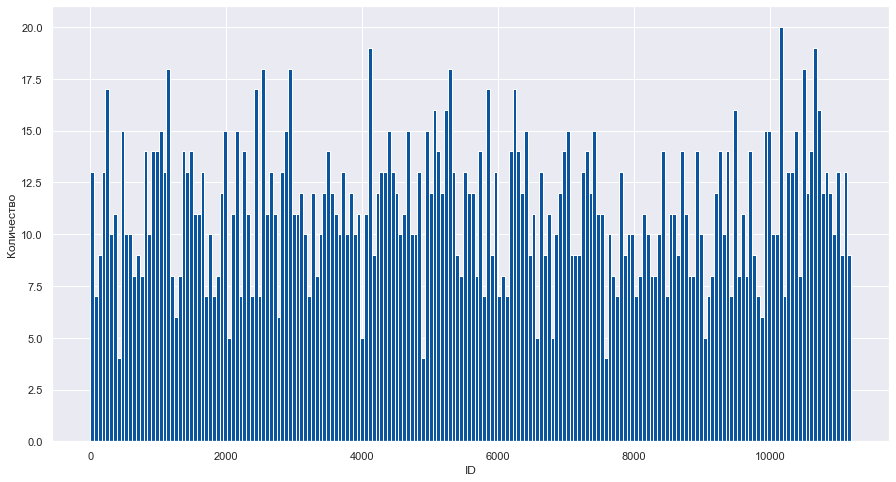

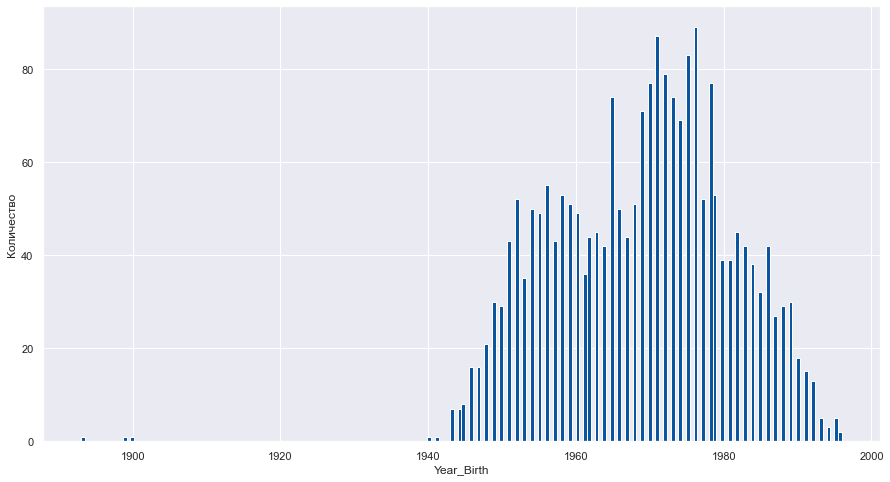

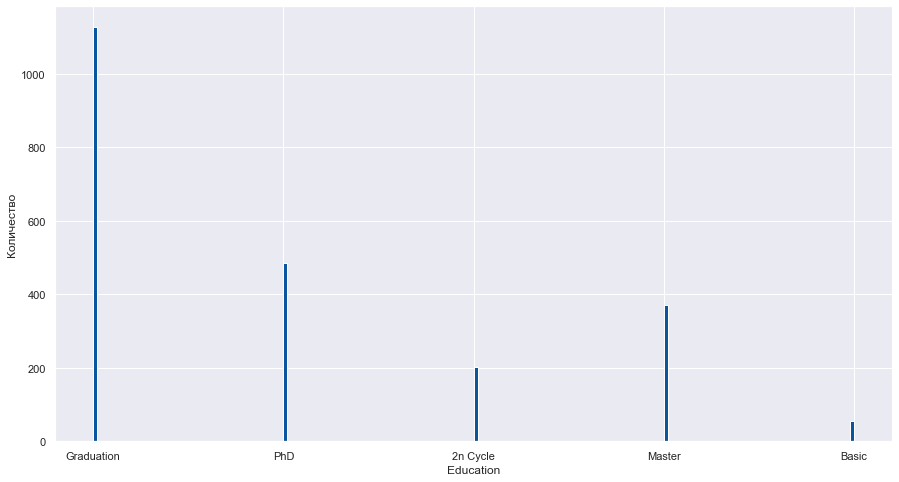

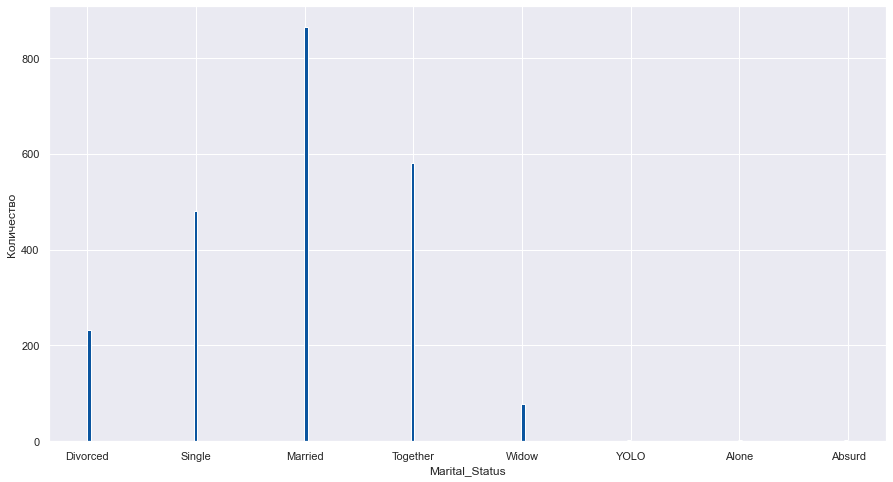

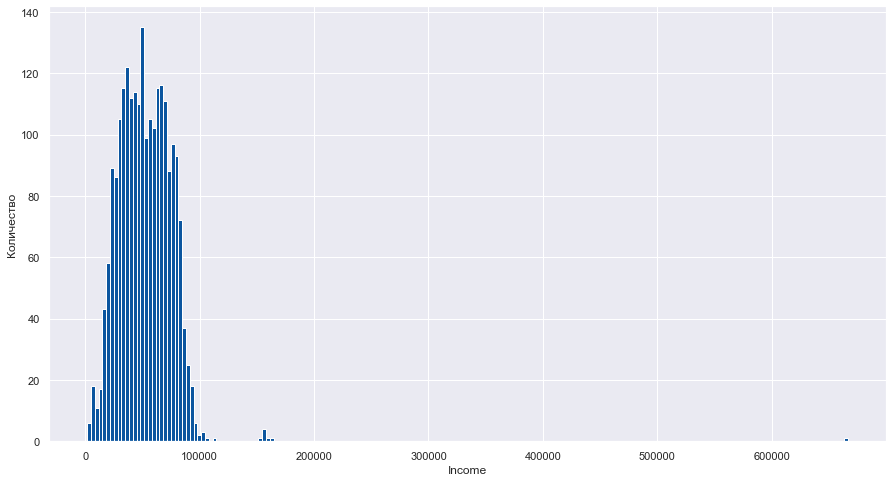

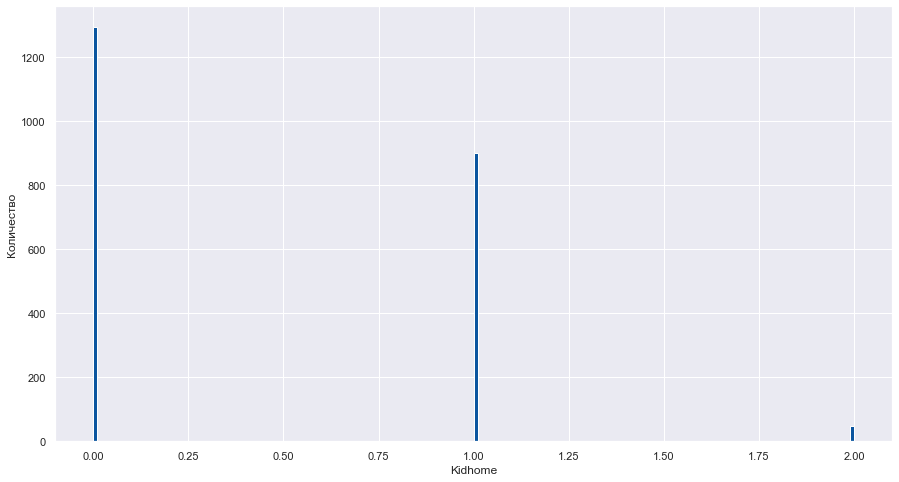

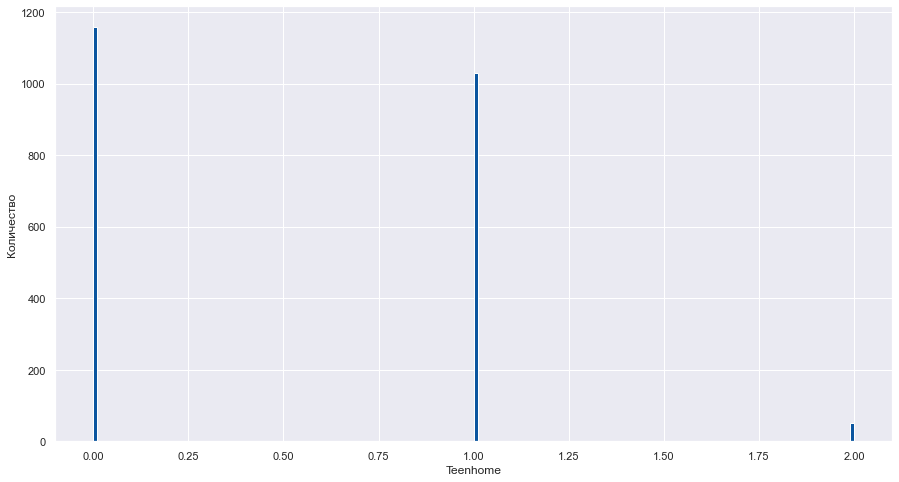

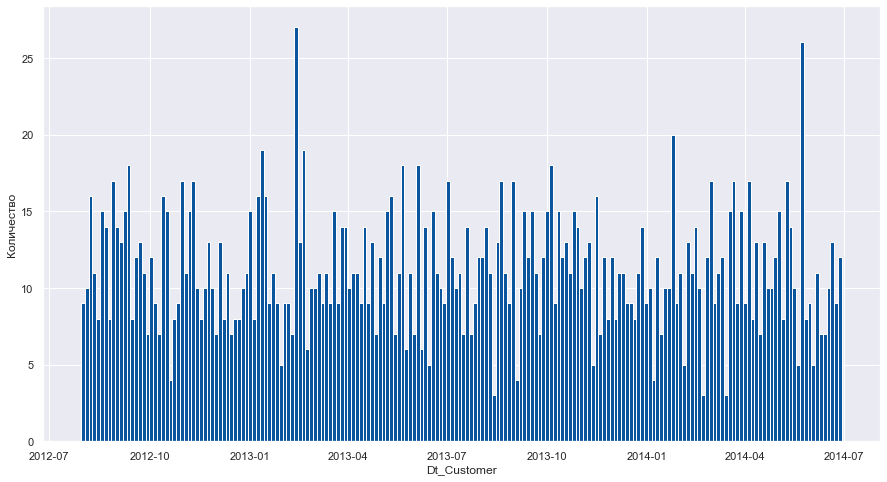

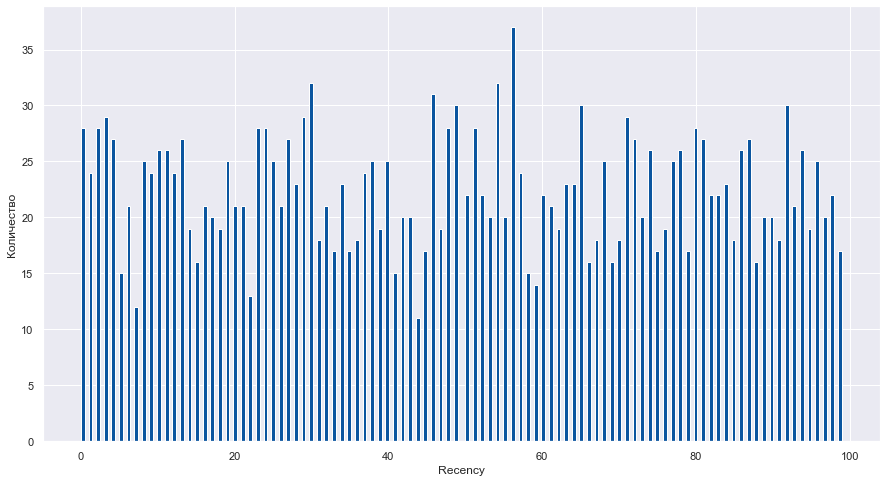

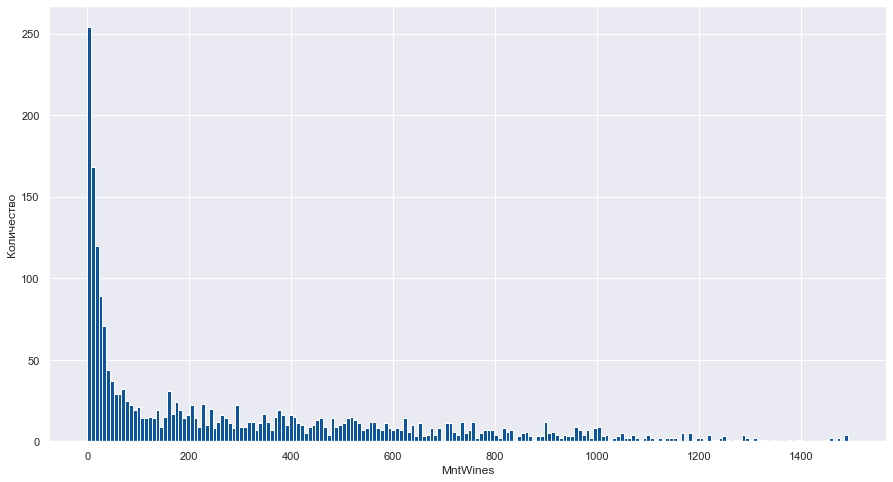

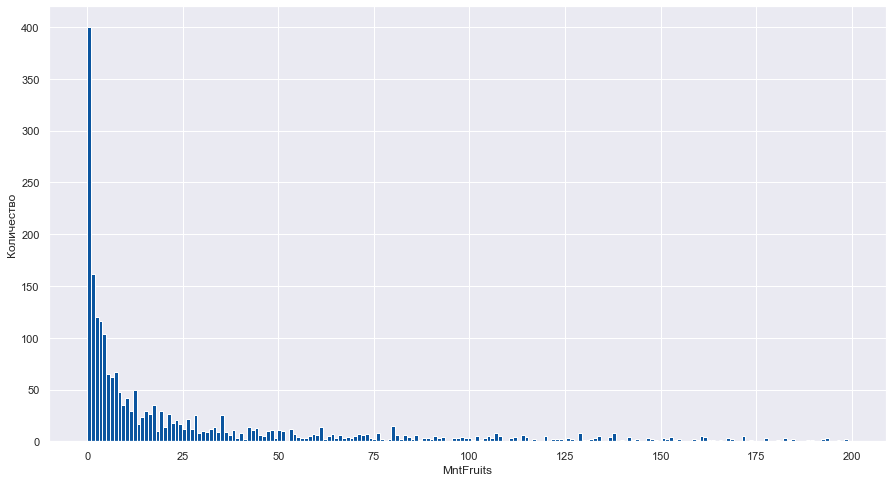

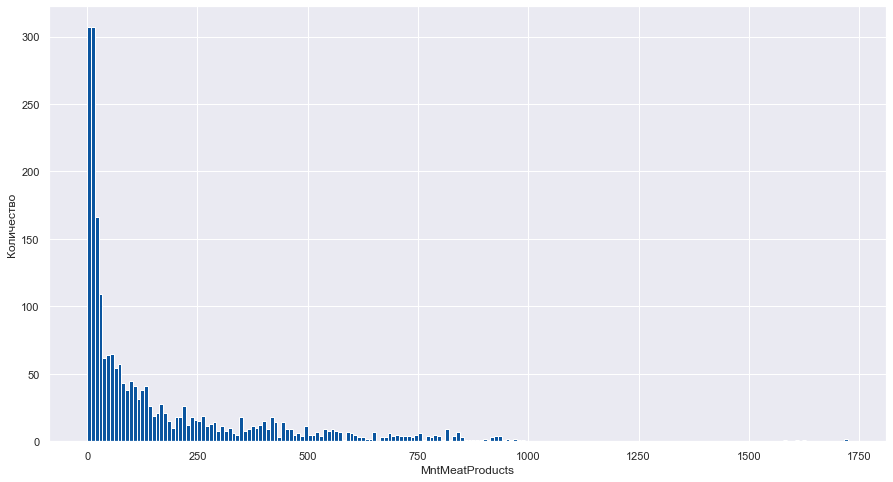

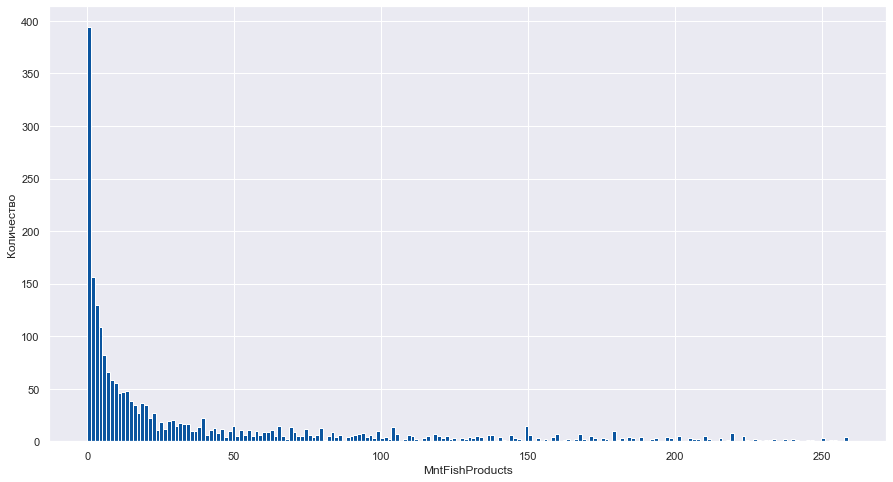

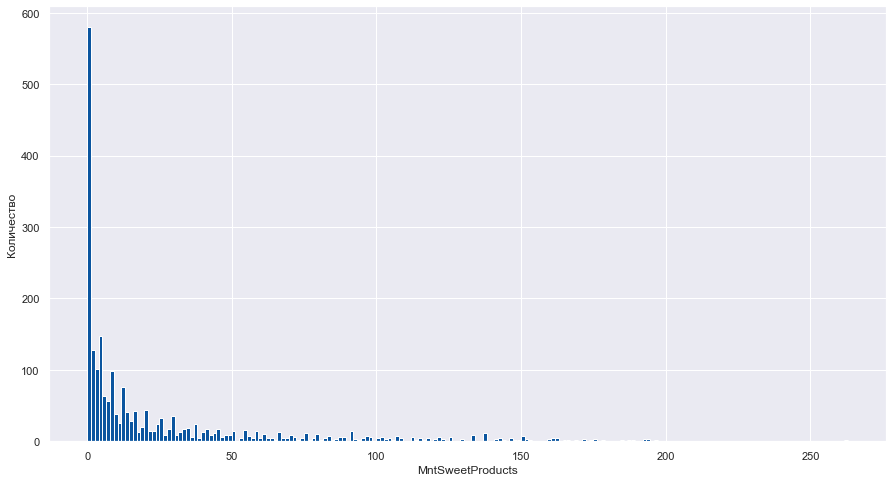

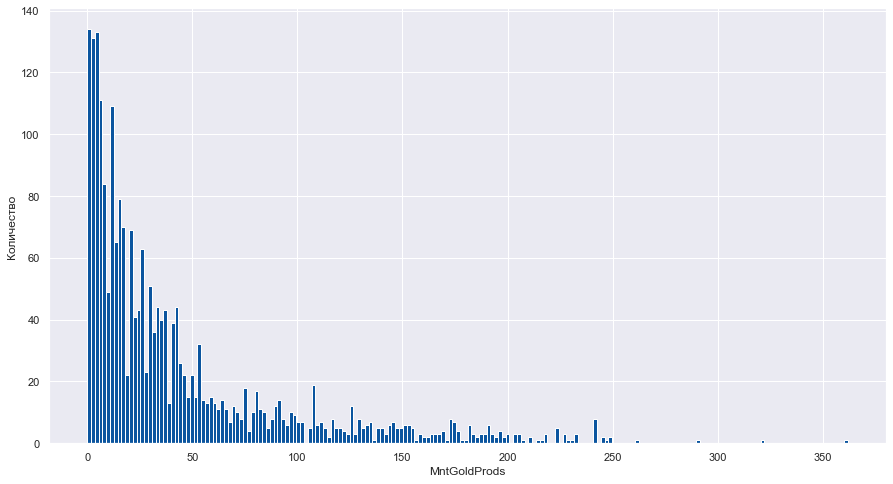

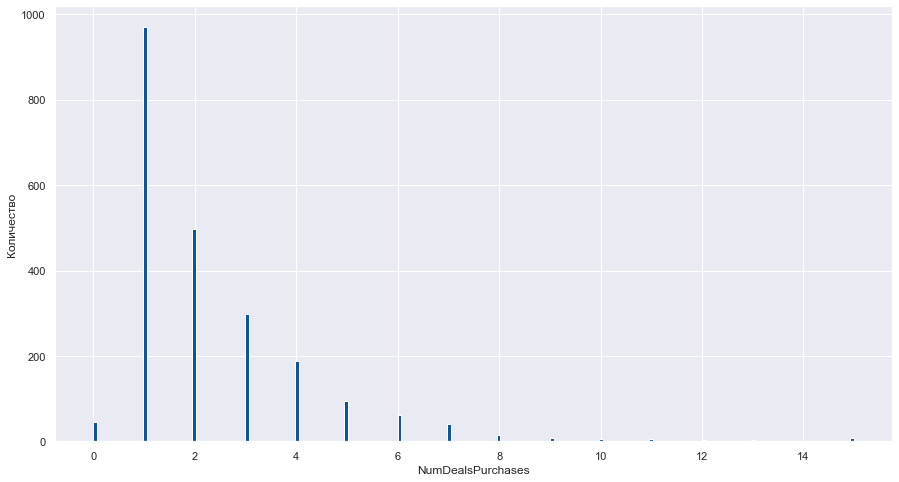

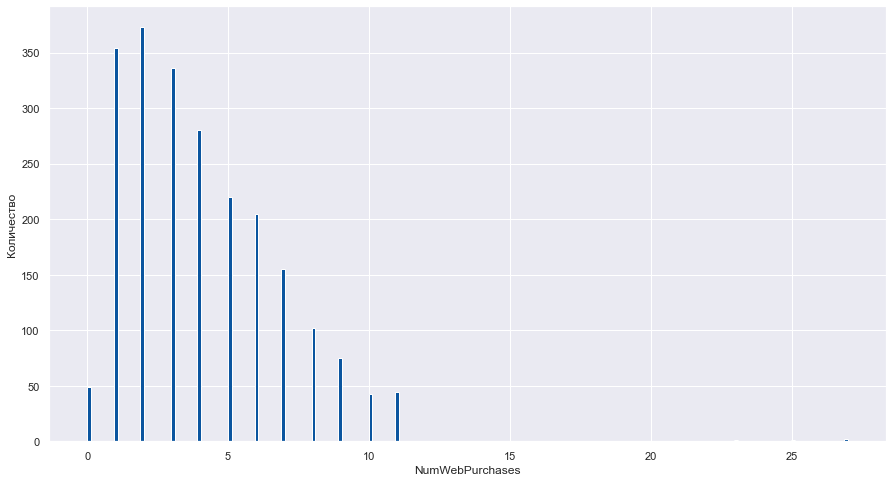

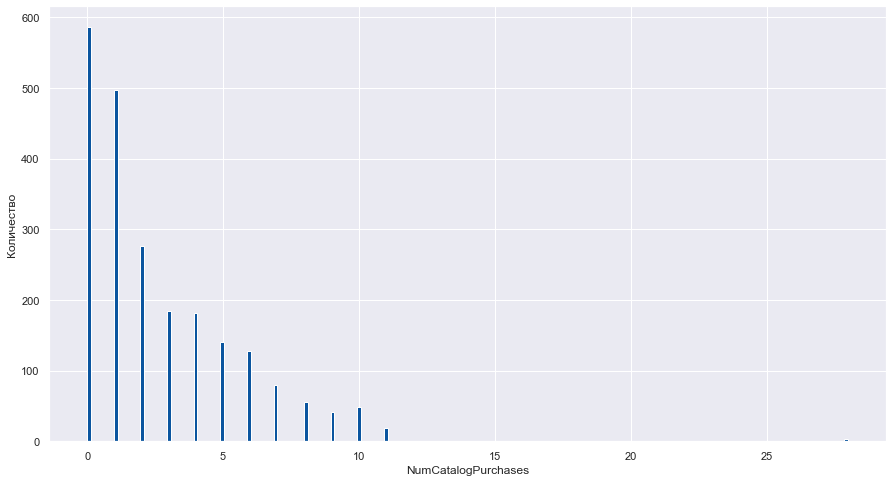

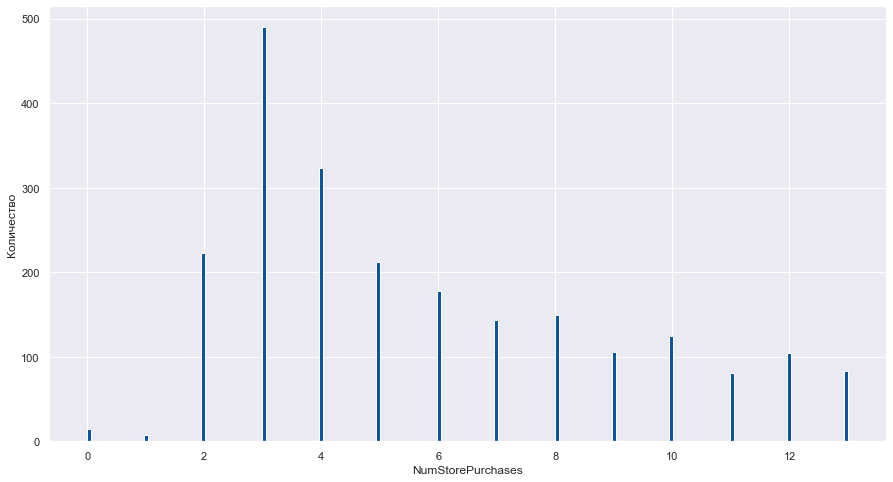

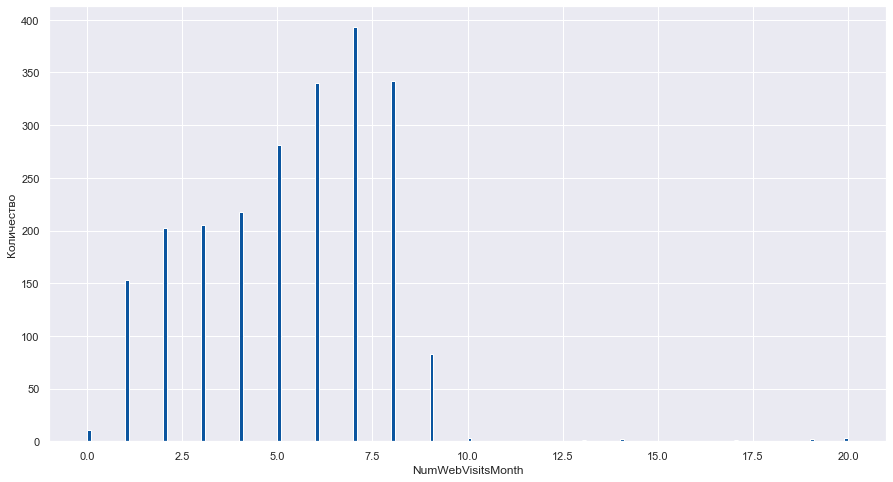

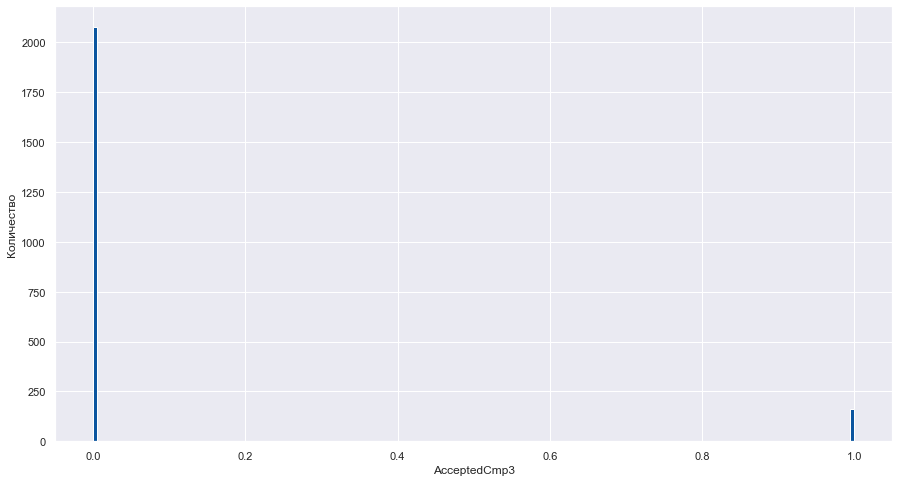

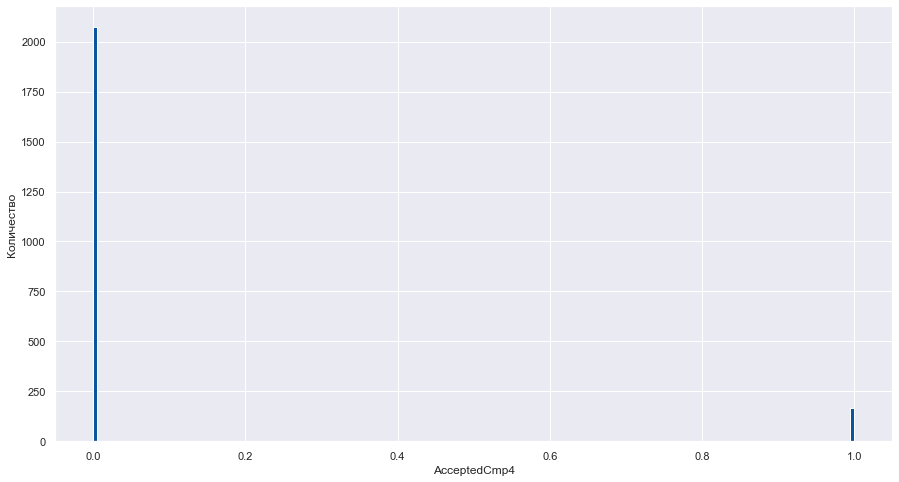

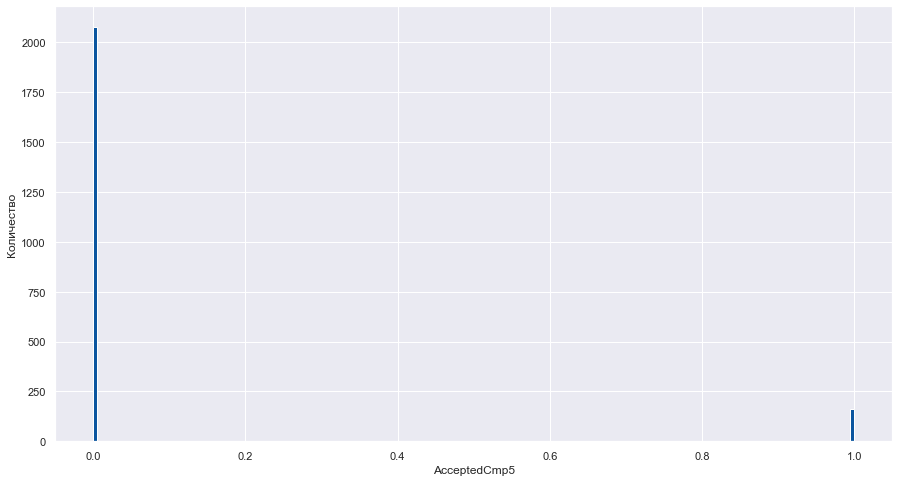

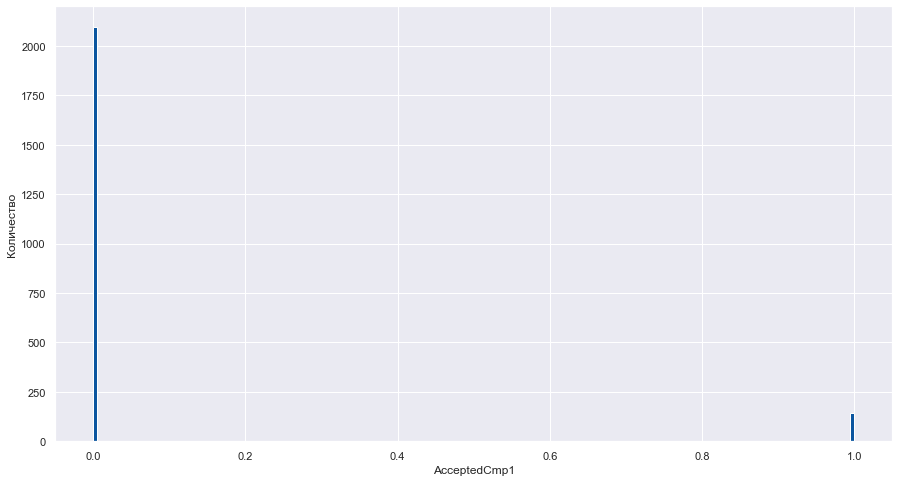

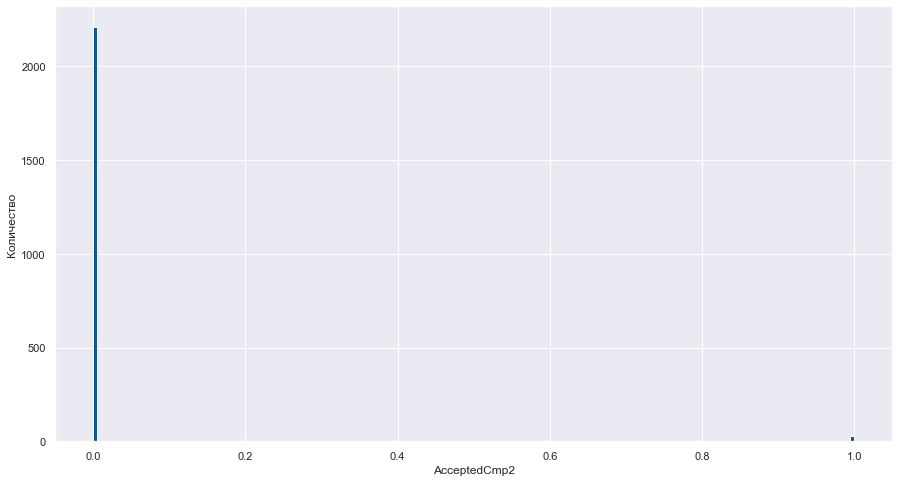

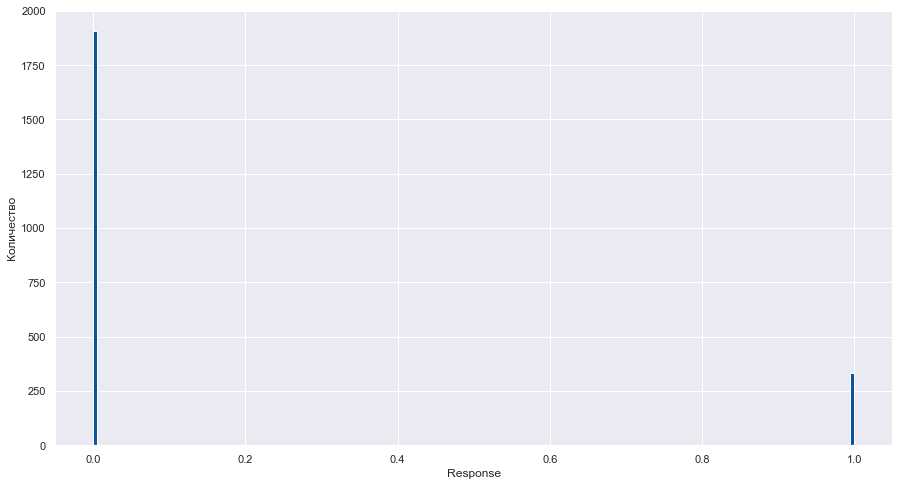

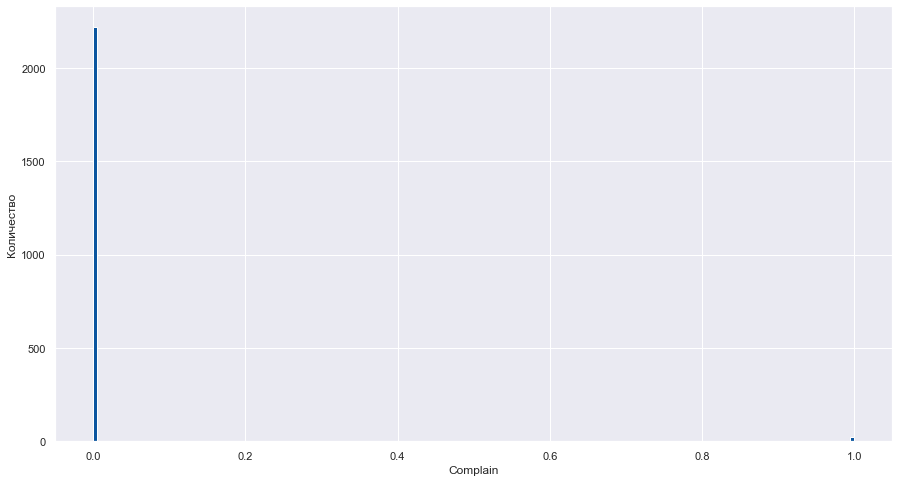

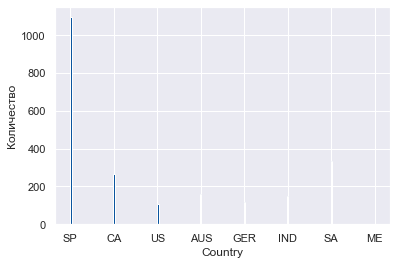

In [16]:
# Ваш код и комментарий
for i in df.columns:
    plt.gcf().set_size_inches(15, 8)
    plt.figure()
    plt.xlabel(i)
    plt.ylabel('Количество')
    plt.hist(df[i], bins = 200)

In [17]:
# Как видно после первичного анализа выбросы есть у зарплаты, year_birth
# Взглянем на каждый из признаков поподробнее, держим в голове значения в describe

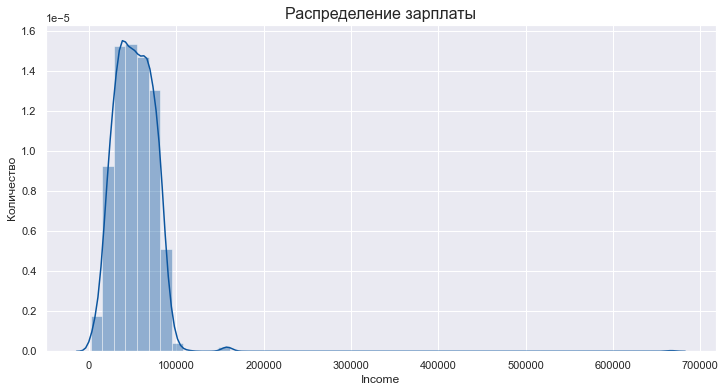

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df['Income'], hist=True)
plt.title('Распределение зарплаты', size=16)
plt.ylabel('Количество');

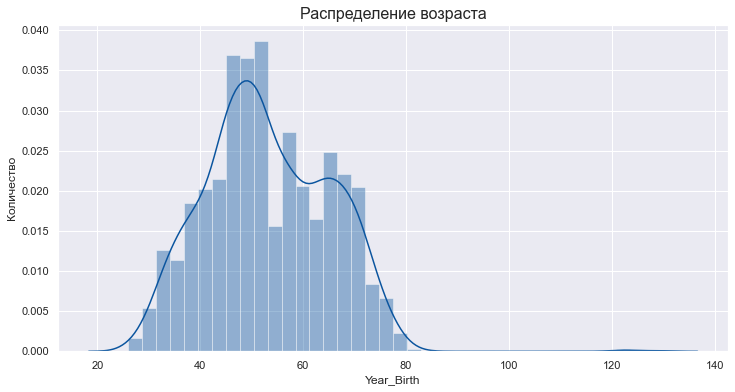

In [19]:
plt.figure(figsize=(12,6))
# sns.distplot(df['Year_Birth'], hist=True)
sns.distplot(2022 - df['Year_Birth'], hist=True)  # возраста
plt.title('Распределение возраста', size=16)
plt.ylabel('Количество');

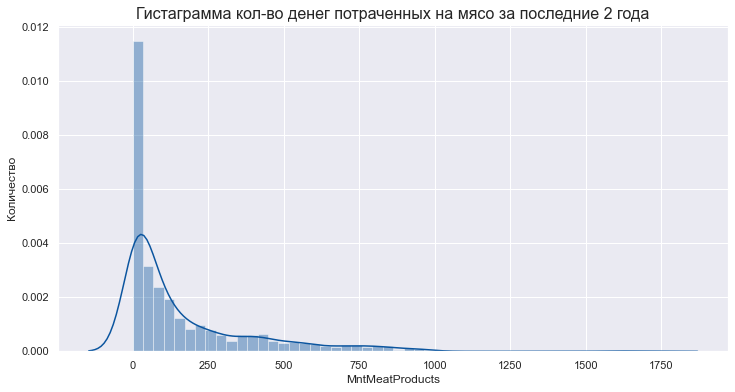

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(df['MntMeatProducts'], hist=True)
plt.title('Гистаграмма кол-во денег потраченных на мясо за последние 2 года', size=16)
plt.ylabel('Количество');

In [21]:
# Избавимся от выбросов
df = df[df['Income']>7000].reset_index(drop=True)
df = df[df['Income']<95000].reset_index(drop=True)  

df = df[df['Year_Birth']>1901].reset_index(drop=True)

In [22]:
# Так как данные о покупках, то сразу можно описать среднего покупателя, смотря на средние значения:
# 1. Возраст 53
# 2. Доход 52000$
# 3. Имеет 1 ребенка
# 4. Больше всего из покупок потратили на вино 173$
# 5. Стал клиентом магазина в 2013

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [23]:
# Ваш код и комментарий
# Сразу напрашивается добавить кол-во лет
df['Age'] = 2022 - df['Year_Birth']
# Общяя стоимость покупок, тоже важно
df['SumMnt'] = df[[col for col in df.columns if 'Mnt' in col]].sum(axis=1)
# общее кол-во покупок
df['SumPurchases'] = df[[col for col in df.columns if 'Purchases' in col]].sum(axis=1)
# Два признака можно схлопнуть в один
df['Children']= df['Kidhome']+df['Teenhome']

In [24]:
df['SumMnt'], df['SumPurchases'], df['Children']

(0       1190
 1        577
 2        251
 3         11
 4         91
         ... 
 2202     689
 2203      55
 2204     309
 2205    1383
 2206    1078
 Name: SumMnt, Length: 2207, dtype: int64,
 0       15
 1       18
 2       11
 3        4
 4        8
         ..
 2202    20
 2203     5
 2204    14
 2205    20
 2206    18
 Name: SumPurchases, Length: 2207, dtype: int64,
 0       0
 1       0
 2       1
 3       2
 4       1
        ..
 2202    1
 2203    1
 2204    1
 2205    0
 2206    2
 Name: Children, Length: 2207, dtype: int64)

## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [25]:
# Ваш код и комментарий
# https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical
categorical = df.select_dtypes(exclude = np.number)
display(categorical.describe())
display(categorical.nunique())
for i in categorical.columns:
    display(categorical[i].value_counts())


,Education,Marital_Status,Dt_Customer,Country
count,2207,2207,2207,2207
unique,5,8,661,8
top,Graduation,Married,2012-08-31 00:00:00,SP
freq,1112,856,12,1079
first,NaN,NaN,2012-07-30 00:00:00,NaN
last,NaN,NaN,2014-06-29 00:00:00,NaN


Education           5
Marital_Status      8
Dt_Customer       661
Country             8
dtype: int64

Graduation    1112
PhD            475
Master         366
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Married     856
Together    570
Single      470
Divorced    227
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

2012-08-31    12
2012-09-12    11
2014-05-12    11
2013-02-14    11
2014-05-22    10
              ..
2013-01-03     1
2013-05-13     1
2012-09-02     1
2013-04-12     1
2012-09-01     1
Name: Dt_Customer, Length: 661, dtype: int64

SP     1079
SA      330
CA      265
AUS     160
IND     144
GER     120
US      106
ME        3
Name: Country, dtype: int64

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [26]:
# Ваш код и комментарий
numerical = df.select_dtypes(include = np.number)
display(numerical.describe())
display(numerical.nunique())
for i in numerical.columns:
    display(numerical[i].value_counts())

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,SumMnt,SumPurchases,Children
count,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,5581.426824,1968.858632,51567.734934,0.447213,0.510195,49.250566,304.058903,26.323516,163.688718,37.516085,26.839601,43.908473,2.319891,4.085637,2.615768,5.821930,5.313548,0.072950,0.072950,0.069325,0.062075,0.01314,0.147259,0.009062,53.141368,602.335297,14.843226,0.957408
std,3246.928880,11.697841,20137.156737,0.539299,0.545118,28.934136,335.519923,39.691255,215.309326,54.524156,40.684684,51.502421,1.836489,2.693366,2.730255,3.217629,2.296576,0.260113,0.260113,0.254063,0.241347,0.11390,0.354444,0.094784,11.697841,597.902207,7.563444,0.750943
min,0.000000,1940.000000,7144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,26.000000,8.000000,1.000000,0.000000
25%,2814.500000,1959.000000,35661.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,45.000000,69.000000,8.000000,0.000000
50%,5454.000000,1970.000000,51381.500000,0.000000,0.000000,50.000000,177.000000,8.000000,67.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,52.000000,396.000000,15.000000,1.000000
75%,8419.000000,1977.000000,67751.000000,1.000000,1.000000,74.000000,504.000000,33.000000,230.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,63.000000,1036.000000,21.000000,1.000000
max,11191.000000,1996.000000,94871.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1607.000000,259.000000,263.000000,362.000000,15.000000,27.000000,11.000000,13.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,82.000000,2525.000000,39.000000,3.000000


ID                     2207
Year_Birth               56
Income                 1943
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                769
MntFruits               157
MntMeatProducts         549
MntFishProducts         181
MntSweetProducts        176
MntGoldProds            209
NumDealsPurchases        15
NumWebPurchases          14
NumCatalogPurchases      12
NumStorePurchases        14
NumWebVisitsMonth        12
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Age                      56
SumMnt                 1039
SumPurchases             34
Children                  4
dtype: int64

1826     1
4599     1
10704    1
2669     1
10037    1
        ..
8104     1
9449     1
3102     1
569      1
4070     1
Name: ID, Length: 2207, dtype: int64

1976    87
1971    85
1975    82
1972    79
1978    77
1970    76
1965    73
1973    72
1969    70
1974    68
1956    55
1958    53
1979    52
1952    52
1959    51
1968    51
1954    50
1966    50
1955    49
1977    48
1960    47
1967    44
1963    44
1962    44
1982    43
1951    43
1957    42
1964    42
1986    42
1983    41
1981    39
1984    38
1980    38
1961    36
1953    35
1985    32
1989    30
1949    29
1988    29
1950    28
1987    26
1948    21
1990    17
1947    16
1946    16
1991    15
1992    13
1944     7
1945     7
1943     7
1993     5
1995     5
1994     2
1996     2
1941     1
1940     1
Name: Year_Birth, dtype: int64

51381.5    24
7500.0     12
35860.0     4
47025.0     3
46098.0     3
           ..
72117.0     1
25804.0     1
33697.0     1
21063.0     1
94871.0     1
Name: Income, Length: 1943, dtype: int64

0    1268
1     891
2      48
Name: Kidhome, dtype: int64

0    1133
1    1022
2      52
Name: Teenhome, dtype: int64

56    36
30    32
46    31
54    31
49    30
      ..
59    14
5     14
22    13
7     12
44    11
Name: Recency, Length: 100, dtype: int64

5      39
2      39
6      36
4      33
1      33
       ..
551     1
489     1
281     1
731     1
169     1
Name: MntWines, Length: 769, dtype: int64

0      396
1      154
2      117
3      116
4      102
      ... 
184      1
140      1
160      1
148      1
189      1
Name: MntFruits, Length: 157, dtype: int64

7      52
11     49
5      49
8      45
6      42
       ..
792     1
510     1
860     1
561     1
701     1
Name: MntMeatProducts, Length: 549, dtype: int64

0      383
2      151
3      130
4      107
6       82
      ... 
181      1
229      1
167      1
231      1
259      1
Name: MntFishProducts, Length: 181, dtype: int64

0      415
1      152
2      126
3       98
4       80
      ... 
132      1
191      1
176      1
99       1
113      1
Name: MntSweetProducts, Length: 176, dtype: int64

4      69
3      68
1      64
5      62
0      61
       ..
158     1
204     1
173     1
245     1
123     1
Name: MntGoldProds, Length: 209, dtype: int64

1     961
2     497
3     297
4     188
5      94
6      61
7      40
0      28
8      14
9       8
11      5
10      5
12      4
13      3
15      2
Name: NumDealsPurchases, dtype: int64

2     372
1     349
3     335
4     276
5     220
6     202
7     151
8     102
9      74
11     44
10     43
0      37
27      1
23      1
Name: NumWebPurchases, dtype: int64

0     571
1     495
2     276
4     182
3     182
5     140
6     124
7      78
8      53
10     48
9      40
11     18
Name: NumCatalogPurchases, dtype: int64

3     489
4     321
2     221
5     212
6     178
8     148
7     142
10    123
12    105
9     103
11     81
13     80
0       2
1       2
Name: NumStorePurchases, dtype: int64

7     393
8     342
6     339
5     280
4     216
3     203
2     197
1     143
9      83
0       7
10      3
19      1
Name: NumWebVisitsMonth, dtype: int64

0    2046
1     161
Name: AcceptedCmp3, dtype: int64

0    2046
1     161
Name: AcceptedCmp4, dtype: int64

0    2054
1     153
Name: AcceptedCmp5, dtype: int64

0    2070
1     137
Name: AcceptedCmp1, dtype: int64

0    2178
1      29
Name: AcceptedCmp2, dtype: int64

0    1882
1     325
Name: Response, dtype: int64

0    2187
1      20
Name: Complain, dtype: int64

46    87
51    85
47    82
50    79
44    77
52    76
57    73
49    72
53    70
48    68
66    55
64    53
43    52
70    52
63    51
54    51
68    50
56    50
67    49
45    48
62    47
55    44
59    44
60    44
40    43
71    43
65    42
58    42
36    42
39    41
41    39
38    38
42    38
61    36
69    35
37    32
33    30
73    29
34    29
72    28
35    26
74    21
32    17
75    16
76    16
31    15
30    13
78     7
77     7
79     7
29     5
27     5
28     2
26     2
81     1
82     1
Name: Age, dtype: int64

46      19
22      17
57      16
44      15
55      15
        ..
2211     1
527      1
1778     1
815      1
1078     1
Name: SumMnt, Length: 1039, dtype: int64

7     149
5     145
4     127
6     122
17    116
9     102
16    101
19     99
8      94
20     94
22     94
21     94
23     87
10     80
18     78
15     71
12     69
25     67
11     66
26     66
14     55
24     55
13     44
27     37
28     33
29     18
32     12
31     11
30     10
34      4
33      4
35      1
1       1
39      1
Name: SumPurchases, dtype: int64

1    1118
0     618
2     418
3      53
Name: Children, dtype: int64

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

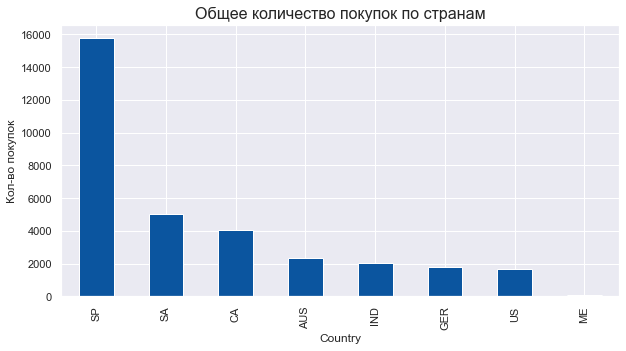

In [27]:
# Ваш код и комментарий
# Income, Age, SumPurchases
my_features = df[['Income','Age','Children']]
features = df[['Marital_Status','Education', 'Country']]
plt.figure(figsize=(10,5))
df.groupby('Country')['SumPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Общее количество покупок по странам', size=16)
plt.ylabel('Кол-во покупок');

# df.groupby('Country')['Income'].sum().sort_values(ascending=False).plot(kind='bar')
# df.groupby('Country')['SumMnt'].sum().sort_values(ascending=False).plot(kind='bar')

In [28]:
# В Испании сильно больше покупок, чем в других странах

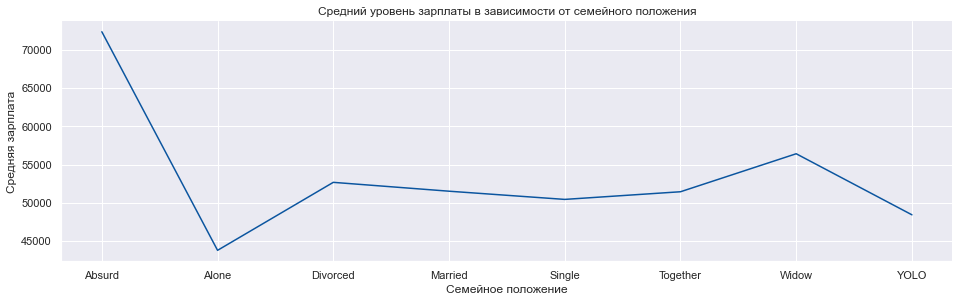

In [29]:
ax = sns.relplot(x='Marital_Status', y='Income',
                 data = df[['Marital_Status', 'Income']].groupby('Marital_Status', as_index=False).mean(), kind='line')
ax.figure.set_size_inches(16, 4)
ax.set(title='Средний уровень зарплаты в зависимости от семейного положения', xlabel='Семейное положение', ylabel='Средняя зарплата')
plt.show()

In [30]:
# Значений Alone = 3, YOLO = 2, Absurd = 2 слишком мало, поэтому их разбирать не будем
# Как видно, средний уровень заробатка в вдов довольно высокий, обусловлено тем, что скорее всего имущества мужа перешло ей

In [31]:
df[df['Marital_Status'].str.contains('Widow')]['Age'].describe()

count    77.000000
mean     63.441558
std       9.335125
min      44.000000
25%      56.000000
50%      64.000000
75%      72.000000
max      79.000000
Name: Age, dtype: float64

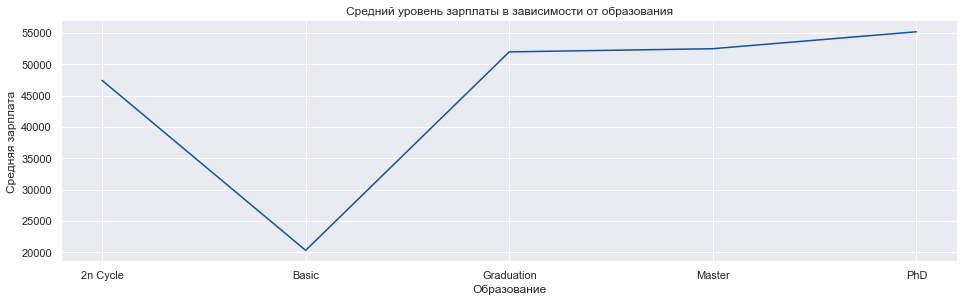

In [32]:
ax = sns.relplot(x='Education', y='Income',
                 data = df[['Education', 'Income']].groupby('Education', as_index=False).mean(), kind='line')
ax.figure.set_size_inches(16, 4)
ax.set(title='Средний уровень зарплаты в зависимости от образования', xlabel='Образование', ylabel='Средняя зарплата')
plt.show()


In [33]:
# В приницпе результаты подтверждают, что в среднем, образованые люди получают больше, чем менее образованные

In [34]:
df[df['Education'].str.contains('PhD')].Country.value_counts()

SP     246
SA      84
CA      53
AUS     30
IND     25
GER     19
US      17
ME       1
Name: Country, dtype: int64

In [35]:
sp_phd = df[(df['Country'] == 'SP') & (df['Education'] == 'PhD')]
us_phd = df[(df['Country'] == 'US') & (df['Education'] == 'PhD')]
aus = df[(df['Country'] == 'AUS')]

<AxesSubplot:title={'center':'График распрделения зарплаты в зависимости от некоторых стран и образования'}, xlabel='Income', ylabel='Density'>

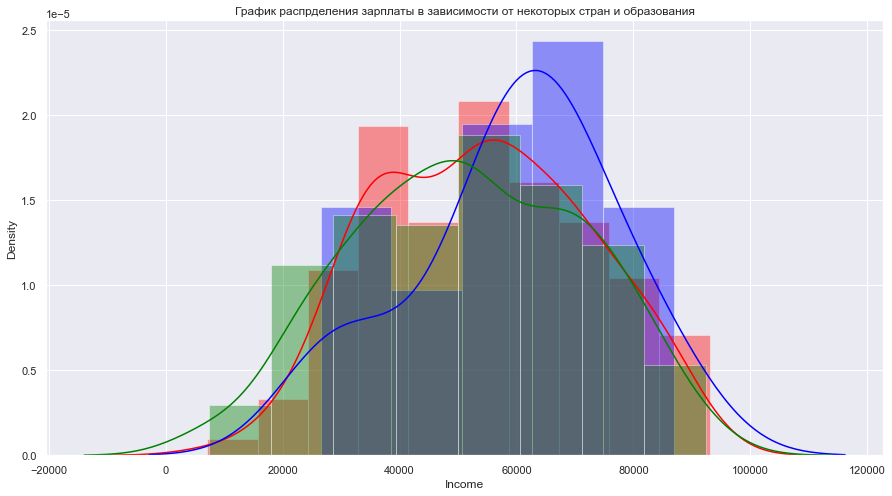

In [36]:
plt.figure(figsize=(15,8))
plt.title("График распрделения зарплаты в зависимости от некоторых стран и образования")
sns.distplot(sp_phd['Income'], color = 'red')
sns.distplot(us_phd['Income'], color = 'blue')
sns.distplot(aus['Income'], color = 'green')

In [37]:
# Попытался поймать интересную особенность.
# Больше всего PhD в Испании, и они зарабатывают в среднем так же, как простой житель Авсрии и Phd в Америке сильно больше

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2207 non-null   int64         
 1   Year_Birth           2207 non-null   int64         
 2   Education            2207 non-null   object        
 3   Marital_Status       2207 non-null   object        
 4   Income               2207 non-null   float64       
 5   Kidhome              2207 non-null   int64         
 6   Teenhome             2207 non-null   int64         
 7   Dt_Customer          2207 non-null   datetime64[ns]
 8   Recency              2207 non-null   int64         
 9   MntWines             2207 non-null   int64         
 10  MntFruits            2207 non-null   int64         
 11  MntMeatProducts      2207 non-null   int64         
 12  MntFishProducts      2207 non-null   int64         
 13  MntSweetProducts     2207 non-nul

In [39]:
# немного предобработаем dataframe, чтобы убрать неинформативные, похожие, явно коррелирующие признаки
corr_df = df.drop(columns=['ID', 'Year_Birth', 'Kidhome', 'Teenhome','Dt_Customer','SumMnt','SumPurchases',
                      'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                      'AcceptedCmp4', 'AcceptedCmp5', 'Response', 
                      'Complain'])

In [40]:
# Ваш код и комментарий
corr_matrix =corr_df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol.head(3)

Income  NumCatalogPurchases    0.731656
        MntWines               0.731138
        MntMeatProducts        0.715446
dtype: float64

In [41]:
# Максимально логичные корреляции, чем больше денег, тем больше тратишь на импортные товары из каталога,
# вино и конечно же мясную продукцию!

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм. 

In [42]:
# Ваш код и комментарий
# Я ранее уже сделал несколько корреляций, поэтому здесь чуть меньше оставлю

In [43]:
# df = pd.DataFrame(np.random.rand(10, 4), columns=["Age", "Income", "SumPurchases", "SumMnt"])

# df.plot.box();
# Наиболее успешными продуктами являются вино и мясо

In [44]:
tot_wine = df['MntWines'].sum()
tot_meat = df['MntMeatProducts'].sum()
tot_fruits = df['MntFruits'].sum()
tot_fish = df['MntFishProducts'].sum()
tot_gold = df['MntGoldProds'].sum()
tot_sweat = df['MntSweetProducts'].sum()
mnt_total = [tot_wine, tot_meat, tot_fish, tot_fruits, tot_gold,tot_sweat ]

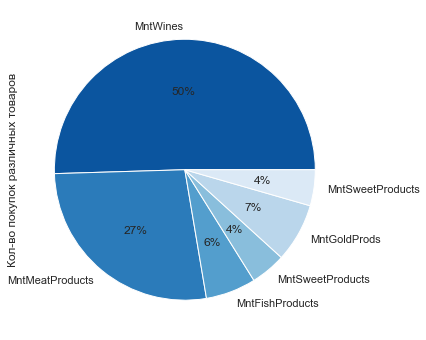

In [45]:
series = pd.Series(mnt_total, index=["MntWines", "MntMeatProducts", "MntFishProducts", 
                                                 "MntSweetProducts",'MntGoldProds',
                                     'MntSweetProducts'], name="Кол-во покупок различных товаров")

series.plot.pie(figsize=(6, 6),autopct='%1.0f%%');

In [46]:
# Наиболее успешными продуктами являются вино и мясо

Text(0, 0.5, 'Кол-во')

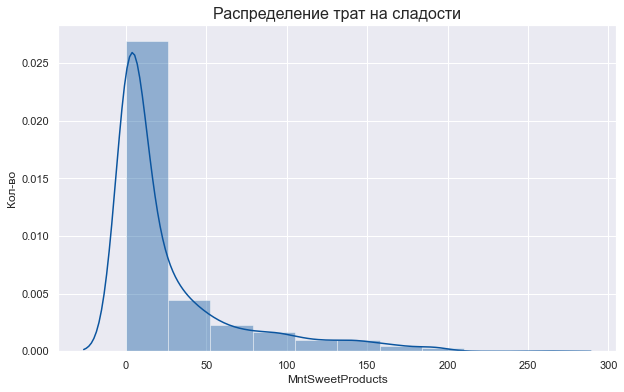

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(df['MntSweetProducts'], kde=True, hist=True, bins=10)
plt.title('Распределение трат на сладости', size=16)
plt.ylabel('Кол-во')

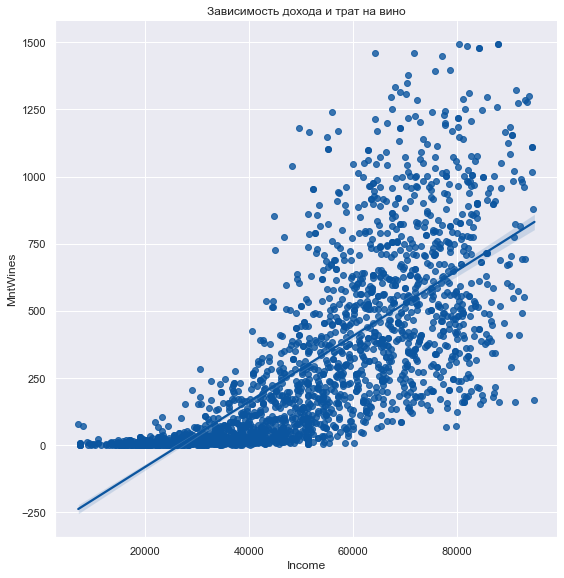

In [48]:
sns.lmplot(x='Income',y='MntWines',data=df,fit_reg=True, size=8).set(title='Зависимость дохода и трат на вино')

In [49]:
# Чем больше доход, тем больше трат на вино

Text(0.5, 1.0, 'Средние траты на мясо в различных странах')

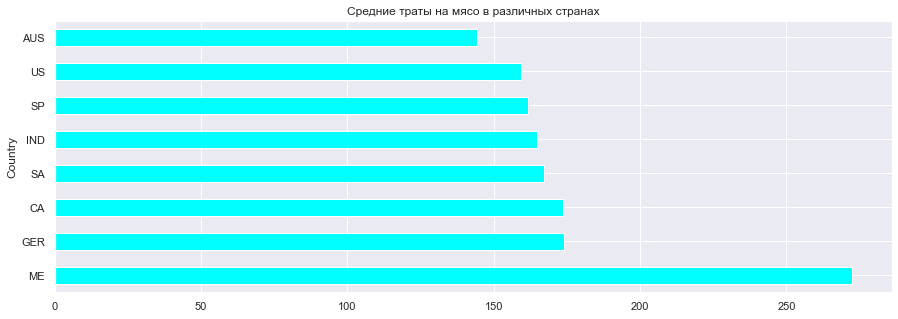

In [50]:
# df["NumDealsPurchases"].plot(figsize=(15, 5));
# df["MntSweetProducts"].plot(secondary_y=True, style="g");
plt.figure(figsize=(15,5))
df.groupby('Country')['MntMeatProducts'].mean().sort_values(ascending=False).plot(kind='barh', color = 'cyan').set_title("Средние траты на мясо в различных странах")

In [51]:
# В Германии в среднем тратят больше денег на мясо, но не факт, что больше едят

## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

Text(0.5, 1.0, 'Зависимость трат на мясо от образования')

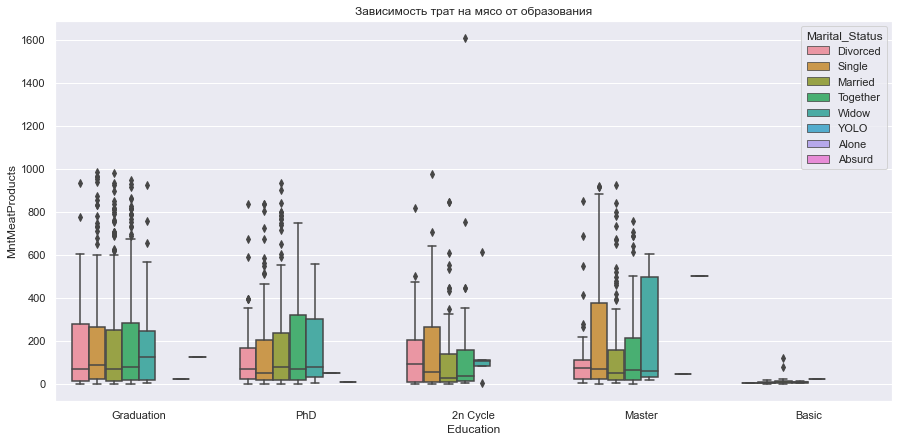

In [52]:
# Ваш код и комментарий
plt.figure(figsize=(15,7))
sns.boxplot(x=df['Education'], y=df['MntMeatProducts'], 
            hue=df['Marital_Status']).set_title("Зависимость трат на мясо от образования")

In [53]:
# Меньше всех среди кандидатов PhD на мясо тратят разведенные ;(